# Datan analysointi S2019 - kerta 7

<a href="#1">Hajontakaavio</a>  
<a href="#2">Keskiarvo, varianssi ja keskihajonta</a>  
<a href="#3">Kovarianssi</a>  
<a href="#4">Korrelaatio</a>  
<a href="#5">Selityskerroin</a>  
<a href="#6">Korrelaatiokertoimen "sudenkuoppia"</a>  
<a href="#7">Korrelaation merkitsevyys</a>  
<a href="#8">Spearmanin järjestyskorrelaatio</a>  
<a href="#9">Korrelaatiomatriisi heatmappina</a>  
<a href="#1a"><b>Lineaarinen regressio</b></a>  
<a href="#2a">Usean selittävän muuttujan regressio</a>  
<a href="#3a">Koneoppiminen</a>  
<a href="#4a">Puuttuvien arvojen käsittely</a>  
<a href="#5a">Tekstikentät numeerisiksi</a>  
<a href="#6a">Jako opetus- ja testidataan</a>  
<a href="#7a">Muuttujien muunnokset</a>  
<a href="#8a">Muuttujien valinta</a>  
<a href="#9a">Muuttujien skaalaus</a>  
<a href="#1b"><b>Logistinen regressio</b></a>  
<a href="#1c"><b>Päätöspuut</b></a>
## Kahden muuttujan välinen riippuvuus
Kahden määrällisen muuttujan riippuvuutta puolestaan tarkastellaan hajontakaavion ja korrelaatiokertoimen avulla.

<a id='1'></a>
### Hajontakaavio
Hajontakaavio antaa nopea silmäyksen kahden muuttujan arvojen jakautumiseen.   
Yleensä ollaan kiinnostuneita liittyykö suuriin x:n arvoihin suuria y:n arvoja, pieniä y:n arvoja vai satunnaisesti monenlaisia y:n arvoja.

Esimerkkitiedostossa on (kuvitteellisia) kurssisuorituksia, kenttinä läsnäolotunnit, tehdyt harjoitustehtävät ja tenttitulos.

Hajontakaavion saa tehtyä matplotlibin `df.plot.scatter`-metodilla.



   Läsnäolo  Harjoitukset  Tentti
0        20            50      30
1         6            10      12
2        18            59      34
3        18            50      28
4        14            42      25


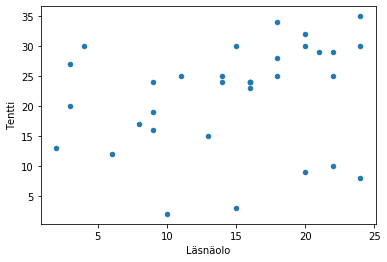

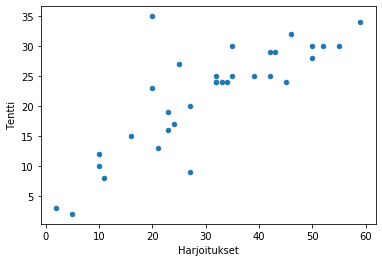

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
print(df.head())

df.plot.scatter('Läsnäolo', 'Tentti')
plt.show()

df.plot.scatter('Harjoitukset', 'Tentti')
plt.show()



Isommat merkit saa `s`-parametrilla ja läpikuultavat `alpha`-parametrilla.

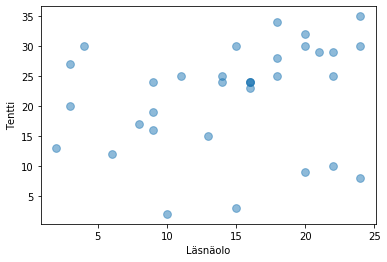

In [4]:
df.plot.scatter('Läsnäolo', 'Tentti', s=60, alpha=0.5)
plt.show()

Seabornin regplot (ja jointplot) tekevät hajontakaavion myös, ja pairplotilla saa useamman muuttujan väliset hajontakaaviot yhdellä komennolla.

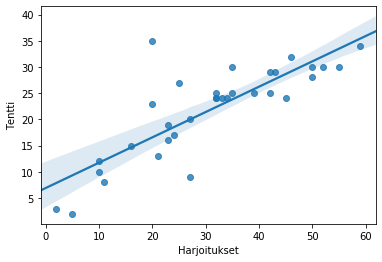

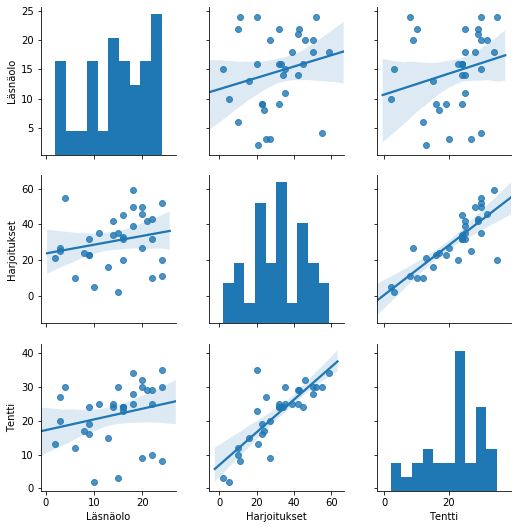

In [5]:
sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()

sns.pairplot(df[['Läsnäolo', 'Harjoitukset', 'Tentti']].dropna(), kind='reg')
plt.show()

Esimerkin hajontakaavioissa läsnäolon ja tenttipisteiden välillä ei nähdä merkittävää yhteyttä, vaan havaintopisteet ovat melko satunnaisesti jakautuneet. Suoritetut harjoitustehtävät sen sijaan näyttävät olevan positiivisessa yhteydessä tenttipistemäärään. Hajontakaaviossa tämä näkyy selvästi nousevana pisteparvena. Alhaiset harjoitustehtävien määrät näyttävät liittyvän alhaisiin tenttipistemääriin ja korkeat harjoitustehtävien määrät näyttävät liittyvän korkeisiin tenttipistemääriin.

<a id='2'></a>
## Keskiarvo, varianssi ja keskihajonta
Yhden muuttujan jakaumaa yleisiä tunnuslukuja ovat keskiarvo ja keskihajonta:
* keskiarvo = arvojen summa/arvojen määrä
* varianssi = keskiarvosta poikkeamien neliöiden keskiarvo
* keskihajonta = varianssin neliöjuuri

Eli varianssia varten lasketaan kunkin arvon poikkeama keskiarvosta ja korotetaan se toiseen potenssiin. 

Pandasissa nämä saadaan DataFramen/Seriesin metodeilla `mean`, `var` ja `std`. Metodi `describe`antaa useita tunnuslukuja samalla kertaa

<a id='3'></a>
## Kovarianssi
Kovarianssia voidaan käyttää kahden muuttujan riippuvuuden mittana. Se kuvaa, kuinka läheisesti "muuttujat vaihtelevat yhdessä". Kovariassi lasketaan kaavalla  

![kovarianssi](https://wikimedia.org/api/rest_v1/media/math/render/svg/1dea006a812e72a1ea35d022c72a704424fc1a12)  

Eli se on keskiarvo muuttujien poikkeamien tulolle. 

Alla on valittu yksi piste ja piirretty sille poikkeamat:  
![cov1](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov1.png)

Tälle siis poikkeaminen tulo on positiivinen (+ kertaa +).

Myös tälle pisteelle poikkeamien tulo on positiivinen (- kertaa -):  
![cov2](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov2.png)

Sen sijaan tällä toinen poikkeama on positiivinen ja toinen negatiivinen joten tulo on negatiivinen:  
![cov3](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov3.png)

Niinpä kovarianssi on positiivinen jos suuriin x:n arvoihin liittyy suuret y:n arvot ja pieniin x:n arvoihin pienet y:n arvot, eli pisteet ovat enimmäkseen näissä neljänneksissä:  
![cov4](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov4.png)

Kovarianssi on negatiivinen, jos suuriin x:n arvoihin liittyy pienet y:n arvot ja päinvastoin:
![cov5](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov5.png)

Jos sen sijaan arvot eivät "vaihtele yhdessä", eli jos suuriin x:n arvoihin liittyy sekä suuria että pieniä y:n arvoja, kovarianssi on lähellä nollaa (tulee positiivisia ja negatiivisia tuloja).

Kovarianssi saadaan pandasissa laskettua Seriesin `cov`-metodilla.

In [18]:
print(df['Läsnäolo'].cov(df['Tentti']))
print(df['Harjoitukset'].cov(df['Tentti']))
print(df['Läsnäolo'].cov(df['Harjoitukset']))

13.782196969696965
106.54829545454545
21.36931818181818


DataFramen `cov`-metodi antaa kovarianssimatriisin:

In [19]:
df.cov()

,Läsnäolo,Harjoitukset,Tentti
Läsnäolo,43.433712,21.369318,13.782197
Harjoitukset,21.369318,220.397727,106.548295
Tentti,13.782197,106.548295,76.820076


Jos aineistossa harjoitus-pistemäärät kerrotaan 10:llä, saadaan samanlainen hajontakaavio harjoitukset<->tentti, mutta kovarianssi kasvaa 10-kertaiseksi:

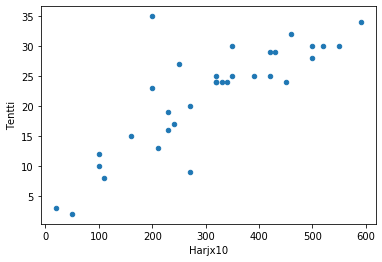

1065.4829545454545


In [20]:
df['Harjx10'] = df['Harjoitukset']*10

df.plot.scatter('Harjx10', 'Tentti')
plt.show()

print(df['Harjx10'].cov(df['Tentti']))

<a id='4'></a>
## Korrelaatio
Kovarianssin yksikkö on 'x:n yksikkö kertaa y:n yksikkö' ja kovarianssin suuruus ei kuvaa suoraan x:n ja y:n välistä riippuvuutta, koska se riippuu myös muuttujien hajontojen suuruudesta. 

Niinpä kovarianssi standardisoidaan välille [-1, 1] jakamalla se x:n ja y:n keskihajontojen tulolla. Tätä suuretta sanotaan **korrelaatiokertoimeksi** ja se kuvaa muuttujien välistä lineaarista riippuvuutta.

![pr1](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/pr.gif)

Tarkempi nimitys tälle on Pearsonin korrelaatiokerroin ja sen voidaan tulkita olevan muotoa:  
![pr2](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/pr2.png)


Mitä enemmän korrelaatiokerroin poikkeaa nollasta, sitä voimakkaampaa muuttujien välinen lineaarinen riippuvuus on:  
* arvo 1 tarkoittaa, että muuttujien välillä on täydellinen lineaarinen riippuvuus
* -1 tarkoittaa täydellistä negatiivista lineaarista riippuvuutta  
-> näissä tapauksissa toisen muuttujan voi laskea tarkasti lineaarisesti toisen arvosta.  
Riippumattomien muuttujien välillä korrelaatiota ei ole, eli korrelaatiokerroin on 0.

Seriesin `corr`-metodi antaa korrelaatiokertoimen parametrina annetun Seriesin kanssa (esim 2 DataFramen saraketta):

In [21]:
print(df['Läsnäolo'].corr(df['Tentti']))
print(df['Harjoitukset'].corr(df['Tentti']))
print(df['Harjx10'].corr(df['Tentti']))

0.23859844699026553
0.8188523219755871
0.818852321975587


Nähdään (kuten hajontakaaviosta), että harjoituksilla on melko voimakas positiivinen korrelaatio tenttituloksen kanssa, läsnäololla ei niinkään.

Jos lasketaan harjoituspisteiden sijaan tekemättömät harjoitukset, saadaan luonnollisesti negatiivinen korrelaatio tenttituloksen kanssa:

-0.8188523219755871


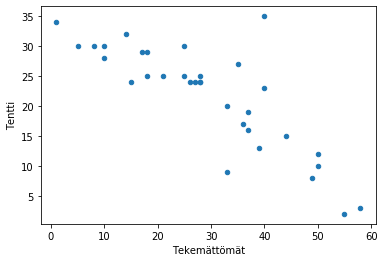

In [22]:
df['Tekemättömät'] = 60 -df['Harjoitukset']
print(df['Tekemättömät'].corr(df['Tentti']))

df.plot.scatter('Tekemättömät', 'Tentti')
plt.show()

DataFramelle `corr`-metodi laskee korrelaatiokerroinmatriisin:

In [23]:
df.corr().applymap("{:.2f}".format)

,Läsnäolo,Harjoitukset,Tentti,Harjx10,Tekemättömät
Läsnäolo,1.00,0.22,0.24,0.22,-0.22
Harjoitukset,0.22,1.00,0.82,1.00,-1.00
Tentti,0.24,0.82,1.00,0.82,-0.82
Harjx10,0.22,1.00,0.82,1.00,-1.00
Tekemättömät,-0.22,-1.00,-0.82,-1.00,1.00


'corrwith'-metodilla saadaan yhden Seriesin korrelaatio DataFramen kaikkiin sarakkeisiin:

In [24]:
df.corrwith(df['Tentti'])

Läsnäolo        0.238598
Harjoitukset    0.818852
Tentti          1.000000
Harjx10         0.818852
Tekemättömät   -0.818852
dtype: float64

[Esimerkkejä](https://fi.wikipedia.org/wiki/Korrelaatio#/media/File:Correlation_examples2.svg) erilaisten pistejoukkojen korrelaatiokertoimista.

<a id='5'></a>
## Selityskerroin
Usein raportoidaan myös Pearsonin korrelaatiokertoimen neliö (r^2). Esimerkiksi jos r^2 = 0.32 sanotaan, että selittävä muuttuja selittää 32 % selitettävän muuttujan varianssista.

In [25]:
df.corr().applymap(lambda x:"{:.1%}".format(x**2))

,Läsnäolo,Harjoitukset,Tentti,Harjx10,Tekemättömät
Läsnäolo,100.0%,4.8%,5.7%,4.8%,4.8%
Harjoitukset,4.8%,100.0%,67.1%,100.0%,100.0%
Tentti,5.7%,67.1%,100.0%,67.1%,67.1%
Harjx10,4.8%,100.0%,67.1%,100.0%,100.0%
Tekemättömät,4.8%,100.0%,67.1%,100.0%,100.0%


<a id='6'></a>
## Korrelaatiokertoimen "sudenkuoppia"

### Korrelaatio ei kerro syy-seuraussuhdetta
Korrelaatio voi olla pienestä otoksesta johtuva sattuma. Voi myös olla, että y on x:n syy tai päinvastoin, tai sitten jokin kolmas asia voi olla molempien syy, esimerkiksi hukkumisia tulee enemmän silloin kun syödään enemmän jäätelöä, mutta sää (kuumuus) on tietysti molempien taustalla.

### Korrelaatio mittaa vain lineaarista riippuvuutta
Muuttujien välillä voi olla riippuvuutta vaikka se ei olisikaan lineaarista, esim. y = x^2 -100x +2500 antaa suuria y:n arvoja pienillä ja suurilla x:n arvoilla

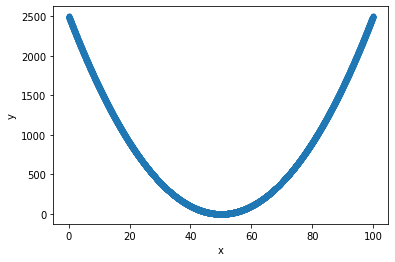

korrelaatiokerroin:  6.166114545296834e-17


In [26]:
import numpy as np

df2 = pd.DataFrame({'x': np.linspace(0,100,10000)})
df2['y'] = df2['x']**2-100*df2['x']+2500

df2.plot.scatter('x','y')
plt.show()

print('korrelaatiokerroin: ', df2['x'].corr(df2['y']))  # korrelaatiokerroin 0

### Poikkeavat havaintoarvot
Yksittäiset poikkeavat havaintoarvot voivat vaikuttaa suuresti korrelaatiokertoimen arvoon, minkä vuoksi on suositeltavaa aina tulostaa tutkittavien muuttujien hajontakuvio.

   Läsnäolo  Harjoitukset  Tentti
0        20            50      30
1         6            10      12
2        18            59      34
3        18            50      28
4        14            42      25


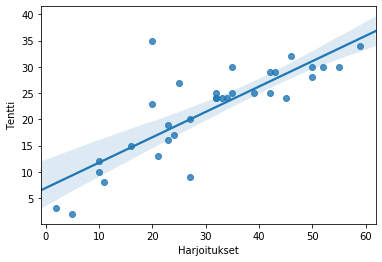

korrelaatiokerroin:  0.8188523219755871


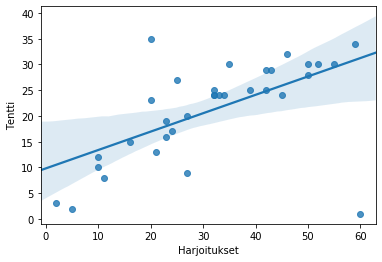

korrelaatiokerroin:  0.5916215121858927


In [27]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
print(df.head())

sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()
print('korrelaatiokerroin: ', df['Harjoitukset'].corr(df['Tentti'])) 

df.iloc[-1] = [12,60,1] # muutetaan 1 arvo


sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()
print('korrelaatiokerroin: ', df['Harjoitukset'].corr(df['Tentti'])) 

<a id='7'></a>
## Korrelaation merkitsevyys
Jos aineisto pohjautuu laajemmasta perusjoukosta satunnaisesti valittuun otokseen, niin tietyin edellytyksin voidaan yleistää otoksen tuloksia perusjoukkoon. Korrelaation tapauksessa tämä tarkoittaa muuttujien välisen korrelaation yleistämistä perusjoukkoon. 

Pienet korrelaatiot voidaan selittää otantavirheellä. Otoksessa havaitun korrelaation täytyy olla riittävän suuri, jotta se voidaan yleistää sen perusjoukkoon. Suuruutta testataan vertaamalla korrelaatiokerrointa hypoteettiseen tilanteeseen, jossa ei ole lainkaan korrelaatiota (korrelaatiokerroin on 0). Jos otoksesta laskettu korrelaatiokerroin poikkeaa riittävästi nollasta, niin korrelaatiota voidaan kutsua *tilastollisesti merkitseväksi*.

Korrelaatiokertoimen merkitsevyyden testaamiseksi lasketaan niin kutsuttu **p-arvo**, joka vastaa seuraavaan kysymykseen: *kuinka todennäköistä on saada havaitun suuruinen tai vielä kauempana nollasta oleva korrelaatiokertoimen arvo ilman että korrelaatiota on perusjoukossa?* Mitä pienempi p-arvo on sitä enemmän korrelaation yleistäminen perusjoukkoon saa tukea.

Vakiintuneen tavan mukaisesti alle 0,05 (5 %) suuruista p-arvoa pidetään riittävänä näyttönä perusjoukossa esiintyvän korrelaation puolesta.

p-arvoa ei saa pandasista mutta otetaan sitä varten käyttöön `scipy.stats` -ohjelmakirjasto, ja käytetään sen `pearsonr`-funktiota. Saadussa monikossa ensimmäinen luku on korrelaatiokerroin ja toinen sen p-arvo.

In [28]:
import scipy.stats as stats

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

print(stats.pearsonr(df['Harjoitukset'], df['Tentti']))

print(df.shape)

(0.8188523219755872, 5.749951854209448e-09)
(33, 3)


eli jos perusjoukossa ei ole korrelaatiota on n. 0,000 000 6 %  todennäköisyys saada 33 alkoin otos jossa korrelaatiokerroin on yli 0,81 tai alle -0,81

#### demo
Demotaan p-arvoa "brute forcella", tehdään 10000 rivin DataFrame, johon arvotaan x ja y satunnaisesti.

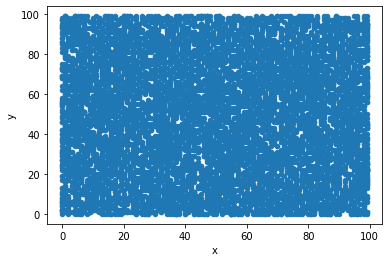

korrelaatiokerroin:  -0.004549256634558595


In [29]:
df3 = pd.DataFrame(np.random.randint(0,100,size=(10000, 2)), columns=['x','y'])

df3.plot.scatter('x','y')
plt.show()

print('korrelaatiokerroin: ', df3['x'].corr(df3['y'])) 


DataFramen `sample`-metodilla voidaan arpoa DataFramesta n rivin "näyte":

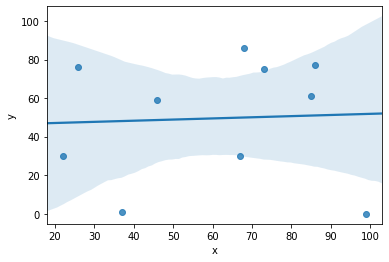

korrelaatiokerroin:  0.049565340744497526


In [30]:
df4 = df3.sample(10)

sns.regplot('x','y', data=df4)
plt.show()
print('korrelaatiokerroin: ', df4['x'].corr(df4['y'])) 


Arvotaan tuhat 10 rivin näytettä, lasketaan näille korrelaatiokertoimet ja tehdään näistä Series: 

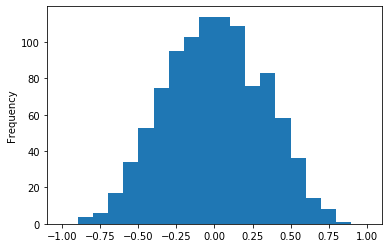

5


In [92]:
korrkt = []

for i in range(0,1000):
    df4 = df3.sample(10)
    korrkt.append(df4['x'].corr(df4['y']))

korrs = pd.Series(korrkt)    

korrs.plot.hist(bins=np.arange(-1,1.1,0.1))
plt.show()

print(len(korrs[(korrs<-0.8) | (korrs>0.8)]))

Tämän mukaan aineistosta, jossa korrelaatiokerroin on (lähes) nolla, otetuista 10 alkion otoksista n. 0,55% on sellaisia, joissa korrelaatiokerroin on alle -0,8 tai yli 0,8. Niinpä korrelaatiokertoimen 0,8 p-arvo kun n=10 on 0,0055.

<a id='8'></a>
## Spearmanin järjestyskorrelaatio
Jos korrelaatiokerroin lasketaan muuttujien arvojen sijaan niiden "sijoituksista", saadaan Spearmanin järjestyskorrelaatiokerroin eli "Spearmanin rho".

Tätä voidaan käyttää siis jo järjestysasteikollisille muuttujille (missä arvojen välimatkat eivät ole mielekkäitä). Lisäksi Spearmanin järjestyskorrelaatiokerroin ei reagoi muuttujien suuriin poikkeamiin yhtä voimakkaasti kuin esimerkiksi Pearsonin korrelaatiokerroin.


In [94]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

print(df['Harjoitukset'].corr(df['Tentti'], method='spearman'))


0.7953197410860204


Saman voisi siis laskea sijoitusten pearson-korrelaationa:

0.7953197410860204


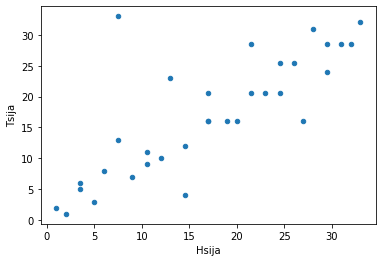

In [95]:
df['Hsija'] = df['Harjoitukset'].rank()
df['Tsija'] = df['Tentti'].rank()

print(df['Hsija'].corr(df['Tsija']))

df.plot.scatter('Hsija', 'Tsija')
plt.show()


Pearson:  0.8188523219755871
Spearman:  0.7953197410860204
Pearson:  0.09940710875298234
Spearman:  0.6979877659873372


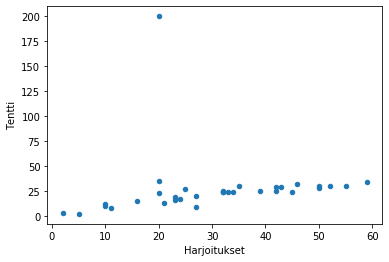

In [10]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')


print("Pearson: ",df['Harjoitukset'].corr(df['Tentti']))
print("Spearman: ",df['Harjoitukset'].corr(df['Tentti'], method='spearman'))

# lisätään poikkeava arvo

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
df.iloc[-1] = [12,20,200] 

print("Pearson: ",df['Harjoitukset'].corr(df['Tentti']))
print("Spearman: ",df['Harjoitukset'].corr(df['Tentti'], method='spearman'))


df.plot.scatter('Harjoitukset', 'Tentti')
plt.show()

<a id='9'></a>
## Korrelaatiomatriisi heatmappina

Seaborn-kirjasto tarjoaa havainnollisen heatmap-"kuvaajaan" korrelaatiomatriisin visualisointiin:

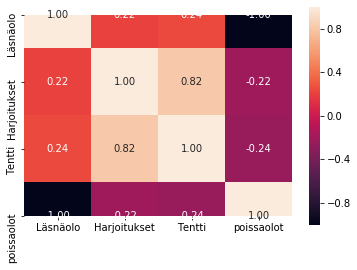

In [35]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

df['poissaolot'] = 24-df['Läsnäolo']

sns.heatmap(df.corr(), annot=True, fmt=".2f", square = True)
plt.show()

Sama vanhalle kunnon Titanic-datasetille:

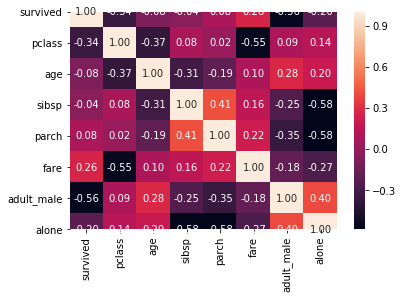

In [9]:
titanic = sns.load_dataset('titanic')
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()

`annot=True` saa seabornin tulostamaan myös luvut ja `fmt=".2f"` määrittää ne 2 desimaalille

<a id="1a"></a>
## Lineaarinen regressio
Kahden määrällisen muuttujan riippuvuutta voidaan havainnollistaa **hajontakaavion** avulla. Lisäksi voidaan laskea lineaarisen riippuvuuden voimakkuutta mittaava korrelaatiokerroin. Näitä tehtiin 6. kerralla.

Jos halutaan selvittää tarkemmin riippuvuuden luonnetta tai hyödyntää riippuvuutta ennustamistarkoituksiin, niin riippuvuutta voidaan mallintaa  **lineaarisen regressiomallin** avulla.

Tässä pyritään arvioimaan **vastemuuttujan eli selitettävän muuttujan y**  lineaarista riippuvuutta **selittävistä muuttujista X**. Selittäviä muuttujia voi olla useampia, mutta tutkitaan ensin teoriaa yhden selittävän muuttujan osalta.

Yksinkertaistettuna lineaarisessa regressiossa pyritään löytämään suoralle *y* = *kx* + *b* parametrit *k* (kulmakerroin) ja *b* (vakiotermi) niin, että havaintopisteet (x,y) olisivat "mahdollisimman lähellä" suoraa. Parametrit valitaan **pienimmän neliösumman menetelmällä** eli verrataan todellisten y:n arvojen eroa suoran *y* = *kx* + *b* antamiin y:n arvoihin ja valitaan *k* ja *b* siten, että erojen neliöiden summa on mahdollisimman pieni.

![kuva](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png)


Lineaarisen regressioanalyysin tekemiseen tarvitaan jotain koneoppimisen/mallinnuksen kirjastoa, joista suosituin on **sklearn (scikit-learn)**. Toinen usein käytetty kirjasto on **statsmodel**. 

[scikit-learn](https://scikit-learn.org/stable/index.html)

Usein pandasia ja sen DataFramea käytetään ensin datan lataamiseen ja siivoamiseen ja sen jälkeen mallinnuskirjastolla tehdään mallin sovitus ja testaus.

Alla on ladataan (kuvitteelliinen) data, jonka hajontakaaviosta nähdään myynnin kasvavan mainoskulujen kasvaessa.


  Kuukausi  mainoskulut keur  myynti keur
0   2015-1               1.3          120
1   2015-2               0.8           82
2   2015-3               1.5          141
3   2015-4               0.7           82
4   2015-5               1.3          130


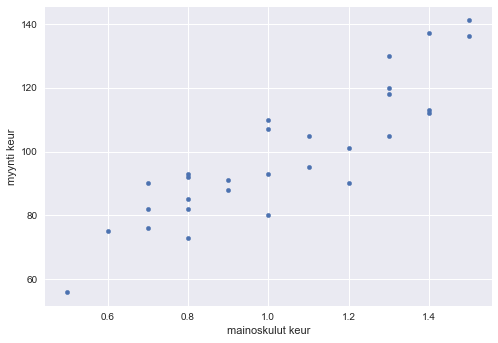

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/2UuPwcV')
print(df.head())
df.plot.scatter('mainoskulut keur', 'myynti keur')
plt.show()

Lineeaarinen malli riippuvuudelle saadaan tuomalla **sklearn.lineal_model** -kirjastosta **LinearRegression** -luokka ja antamalla sille selittäväksi muuttujaksi mainoskulut ja selittäväksi muuttujaksi myynti.

Pelkkää `df['mainoskulut keur']` -Seriesiä ei voi kuitenkaan tuoda x:nä, sillä selittävän muuttujan pitää olla DataFrame, siksi muutetaan se `to_frame`-metodilla.

`fit`-sovitus antaa tulosteena mallin lähtötiedot (joita voisi säätää, jos tuntee käytettävän mallin):

In [18]:
from sklearn.linear_model import LinearRegression
malli=LinearRegression()
x = df['mainoskulut keur'].to_frame()  # muutetaan DataFrameksi
y = df['myynti keur']
malli.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

`fit`-sovituksen jälkeen malli-olio sisältää mallin parametrit `coef_`- ja `intercept`-kentissä:

In [21]:
print(malli.coef_)  # kulmakerroin
print(malli.intercept_) # vakiotermi

[ 64.5961711]
32.3487885133


Kulmakerroin tulee listamuodossa (array), koska mallissa voisi olla useampia selittäviä muuttujia ja näin ollen myös useampia kulmakertoimia. Tässä mallina on siis suora, jonka yhtälö on  **y = 64,596x + 32,349**

Mallin mukaan siis yhden keur lisäys mainoskuluissa lisää myyntiä 64,596 keur.

Selityskerroin saadaan komennolla `malli.score(x,y)`, selityskerroinhan on korrelaatiokertoimen neliö

In [24]:
print(malli.score(x,y))
# toisaalta
print(df['mainoskulut keur'].corr(df['myynti keur'])**2)

0.787624300218
0.787624300218


Tässä siis 78,7 % myynnin varianssista voidaan selittää mainoskuluilla.

Mallin `predict`-metodilla voidaan ennustaa mallin mukaisia y:n arvoja annetuille x:lle, ja tätä voidaan käyttää myös regressiosuoran piirtämiseen hajontakaavioon. Sama saataisiin myös laskemalla y:t regressiosuoran yhtälöllä  y = 64,596x + 32,349 mutta `predict` tekee sen automaattisesti.

[  87.25553395  106.63438528]


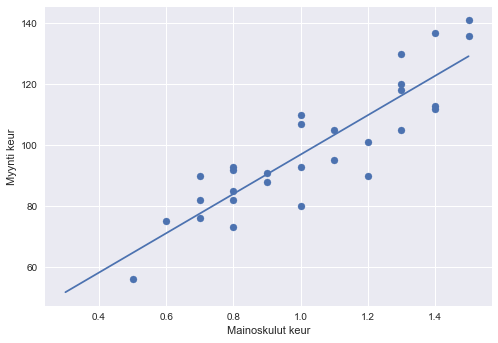

In [42]:
print(malli.predict([[0.85],[1.15]])) # mainoskuluja 0,85 ja 1,15 vastaavat myynnit 

import numpy  as np

xfit = np.linspace(0.3,1.5,100) #100 arvoa tasavälein väliltä 0.3-1.5
Xfit = pd.DataFrame(xfit)
yfit = malli.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlabel('Mainoskulut keur')
plt.ylabel('Myynti keur')
plt.show()

Toki voidaan laskea ennusteet kaikille aineiston x-arvoille, ja tehdä kaavio aineiston y-arvoista ja ennusteista:

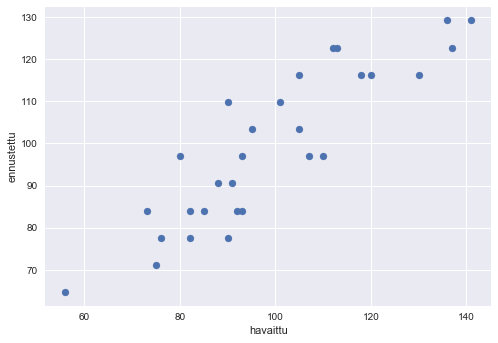

In [44]:
ennusteet = malli.predict(x)
plt.scatter(y, ennusteet)

plt.xlabel('havaittu')
plt.ylabel('ennustettu')
plt.show()

<a id="2a"></a>
### Usean selittävän muuttujan regressio 
Lineaarinen regressio voidaan määrittää myös käyttäen useammampaa selittävää muuttujaa. Tällöin haetaan pienimmän neliösumman menetelmällä parametrit kaavaan  
![kaava](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/kaava.png)

Tämä saadaan määritettyä scikit-learn-kirjastolla vastaavalla tavalla antamalla LinearRegression-oliolle selittäviksi muuttujiksi useampia sarakkeita sisältävä DataFrame.

Esimerkissä (kuvitteellisia) kesämökkien hintoja mallinnetaan rantaviivan pituuden, pinta-alan ja sähkön (0/1) perusteella. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



df = pd.read_csv('https://bit.ly/2CeUELc')
print(df.head())

x = df[['ranta_m','pinta-ala_m2','sähkö']]
y = df['hinta_ke']

malli=LinearRegression()
malli.fit(x,y)

print('Selityskerroin:',malli.score(x,y)) 



# vakiotermi ja kulmakertoimet
print('vakiotermi:',malli.intercept_)
print('kulmakertoimet:',malli.coef_)

   nro  ranta_m  pinta-ala_m2  sähkö  hinta_ke
0    1       30            50      0        95
1    2       35            42      0        95
2    3       40            25      1        80
3    4       50            30      1       100
4    5       55            45      0       135
Selityskerroin: 0.883468562001
vakiotermi: -85.844696481
kulmakertoimet: [  1.90510961   2.60786899  23.46476406]


Mallin mukaan siis 88 % hintojen vaihtelusta selittyy selittävien muuttujien avulla. Pienimmän neliösumman virheelle antaa kaava  
hinta = -85.844... + 1.905...\*rantaviiva + 2.6078...\*ala + 23.464...\*sähkö

1 metri rantaviivaa lisää hintaa 1,905, 1 m2 pinta-alaa 2,6078 ja sähkön olemassaolo 23,464 ke.

Regressiosuoran piirtäminen ei onnistu, koska tilanne on moniulotteinen mutta voidaan kuvata havaitut ja ennustetut arvot:

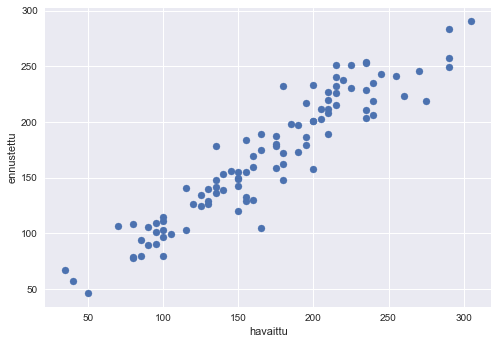

In [87]:
ennusteet = malli.predict(x)

plt.scatter(y, ennusteet)

plt.xlabel('havaittu')
plt.ylabel('ennustettu')
plt.show()


Kaaviona voidaan esittää myös mallin ennusteen ja toteutuman erot, tästä nähdään onko virhe satunnaista:

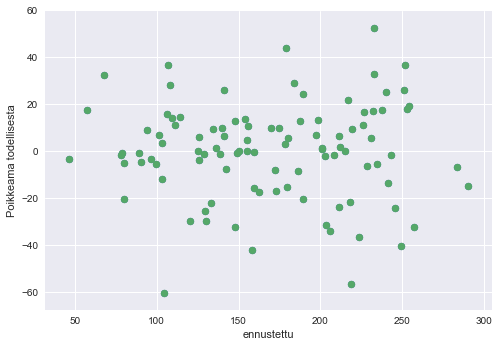

In [54]:
plt.scatter(malli.predict(x), malli.predict(x)-y)
plt.xlabel('ennustettu')
plt.ylabel('Poikkeama todellisesta')
plt.show()

<a id="3a"></a>
## Koneoppiminen
Lineaarinen regressio on yksi malli **koneoppimisesta**, jossa pyritään olemassaolevan datan avulla ennustamaan "uusien havaintojen" y:n arvoja. Tässä, kuten muissakin koneoppimisen malleissa, tulee vastaan muutamia käsitteitä/vaiheita:

<a id="4a"></a>
### Puuttuvien arvojen käsittely
scikit-learn ja statsmodel-kirjastoille ei yleensä voi antaa dataa jossa on puuttuvia arvoja (missing values).

Datassa olevien puuttuvien arvojen määrän saa pandasissa `isnull().sum()`


In [55]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Usein tyhjät arvot korvataan ko. kentän mediaanilla

In [57]:
korvaava = df['age'].median()

df['age'].fillna(korvaava, inplace=True)

df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<a id="5a"></a>
### Tekstikentät numeerisiksi
Lineaariesta regeressiota (eikä monia muitakaan koneoppimismalleja) voidä käytää tekstimuotoiseen dataan, vaan kaikki käytettävät kentät pitää olla numeerisia. 

Esim. jos datassa on kenttä viikonpäivä tekstinä (maanantai, tiistai jne) voidaan tätä käyttää lineaarisessa regressiossa jos kenttä saadaan numeeriseksi 0,1,2... (tai 1,2,3...)

Tähän on useita keinoja:

pandasin `map`-metodilla voidaan antaa uudet arvot
`df['paiva'].map({'maanantai': 0, 'tiistai': 1, #jne })`



In [61]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim3.txt')
print(df.head())
df['paivanro'] =  df['paiva'].map({'maanantai': 0, 'tiistai': 1, 'keskiviikko': 2, 'torstai': 3, 'perjantai': 4, 'lauantai': 5, 'sunnuntai':6})
print(df.head())


       paiva        arvo
0    torstai  107.623820
1  maanantai   99.557211
2   lauantai  108.502577
3  sunnuntai  112.186754
4  perjantai  116.402182
       paiva        arvo  paivanro
0    torstai  107.623820         3
1  maanantai   99.557211         0
2   lauantai  108.502577         5
3  sunnuntai  112.186754         6
4  perjantai  116.402182         4


scikit-learn -kirjastossa on preprocessing.LabelEncoder -luokka joka tekee tämän automaattisesti

In [67]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim3.txt')
print(df.head())

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['paivanro'] = labelencoder.fit_transform(df['paiva'])

print(df.head())

print(labelencoder.inverse_transform([0,1,2])) # muunnos toiseen suuntaan

       paiva        arvo
0    torstai  107.623820
1  maanantai   99.557211
2   lauantai  108.502577
3  sunnuntai  112.186754
4  perjantai  116.402182
       paiva        arvo  paivanro
0    torstai  107.623820         6
1  maanantai   99.557211         2
2   lauantai  108.502577         1
3  sunnuntai  112.186754         4
4  perjantai  116.402182         3
['keskiviikko' 'lauantai' 'maanantai']


LabelEncoder:n käytössä on kuitenkin pari ongelmaa: numerot tulevat luokille aakkosjärjetyksessä eikä sille voi (helposti) määrittää haluttua järjestystä. 

Se sopisikin vain tilanteisiin joissa luokkien välillä ei ole mielekästä järjestystä, esim. valtio-kenttään.

Mutta jos luokkien välillä ei ole mielekästä järjestystä, ei tällaisia lukuja voi myöskään käyttää regerssiossa.
Esim. maa alla olevassa datassa voitaisiin koodata 1,2,3,4 mutta näille ei ole mielekästä järjestystä.

In [63]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim4.txt')
print(df.head())

      maa       arvo1  arvo2
0  Ruotsi  106.393696      8
1   Suomi  107.115620      3
2   Norja   97.819197      4
3  Ruotsi  104.838592      3
4   Suomi  103.141195      8


Tällaisen datan käyttö numeerisena on mahdollista ns. **one-hot-encoding** -menetelmän avulla (käytetään myös termiä dummy encoding).  Siinä jokaisesta kentästä löytyvästä arvosta tehdään uusi kenttä, jossa arvot ovat 0 tai 1.

Tähän voi käyttää pandasin `get_dummies` -metodia:

In [83]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim4.txt')
dummies = pd.get_dummies(df['maa'], prefix='onmaa')

df = df.join(dummies).drop('maa', axis=1)

print(df.head())

        arvo1  arvo2  onmaa_Norja  onmaa_Ruotsi  onmaa_Suomi  onmaa_Tanska
0  106.393696      8            0             1            0             0
1  107.115620      3            0             0            1             0
2   97.819197      4            0             0            1             0
3  104.838592      3            0             1            0             0
4  103.141195      8            0             0            0             1


(saman voisi tehdä myös scikit-learnin OneHotEncoder-luokalla).

Kaksiluokkaisen muuttujan (esim sukupuoli) voi esittää yhdellä numerolla (0/1 tai 1/2), vaikka luokille ei olisikaan mielekästä järjestystä. Ei ole mielekästä tehdä erikseen kenttiä onMies ja onNainen arvoilla 0/1, koska nämä riippuvat toisistaan suoraan. Niinpä riittää jompikumpi kentistä, tai sitten vain sukupuoli (mies=0, nainen=1), olettaen että tässä ei ole muita mahdollisuuksia. 

True/False -arvoja sisältävän kentän saa 0/1:ksi yksinkertaisesti `df['onko'].astype(int)`

Lineaarista regressiota ei voi laskea jos selittävissä muuttuujista kaksi riippuvat toisistaan lineaarisesti, esim. sama arvo eri yksiköissä tai onMies/onNainen.


<a id="6a"></a>
### Jako opetus- ja testidataan
Usein koneoppimisessa käytettävä data jaetaan kahteen osaan, opetus- ja testidataan. Lineaarisen regression tapauksessa parametrit (vakiotermi ja kulmakertoimet) määritetään testidata-aineiston avulla ja saatua mallia testataan testidataan, eli `score()` lasketaan testidatasta (jota ei ole käytetty mallin luontiin).

Jakoa ei voi tehdä manuaalisesti tyyliin "60% riveistä datan alusta opetukseen, loput testiin", koska tällöin jaossa voi tulla vääristymiä (tietyntyyppiset tietueet voivat olla alussa/lopussa).

Satunnaisesti tapahtuvaan jakoon käytetään yleensä scikit-learnin `model_selection.train_test_split` -luokkaa.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split 

df = pd.read_csv('https://bit.ly/2CeUELc')

x = df[['ranta_m','pinta-ala_m2','sähkö']]
y = df['hinta_ke']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(xTrain.shape)
print(xTest.shape)                                             

(70, 3)
(30, 3)


`test_size = 0.3` määrittää että 30% riveistä menee testidataan (loput opetusdataan). `random_state = 15` alustaa satunnaislukugeneraattorin ja antamalla eri kerroilla saman luvun, saadaan aina sama jako.


In [82]:
from sklearn.linear_model import LinearRegression

malli=LinearRegression()

# tehdään malli opetusdatalla
malli.fit(xTrain,yTrain)

# testataan testidatalla
print('Selityskerroin:',malli.score(xTest,yTest)) 

Selityskerroin: 0.899211020244


<a id="7a"></a>
### Muuttujien muunnokset
Määrällisten muuttujiev välillä voi olla riippuvuus, vaikka se ei olisikaan lienaarista. Tällöinkin voidaan käyttää lineaarista regressiota tekemällä muuttujille matemaattisia muunnoksia eli jos y = k\*x^2  voidaan selittäväksi muuttujaksi ottaa x:n sijaan x^2. Muunnoksena voi olla myös logaritmi tai neliöjuuri.

Esim. käytettäessä henkilön vuosituloja selittävänä muuttujana 10000 euron lisäys vaikuttaa varmaan eri tavalla tulojen kasvaessa 20 000->30 000 kuin 200 000->210 000.

Yhden selittävän muuttujan tapauksessa sopiva muunnos nähdään usein suoraan hajontakaaviosta:

Ohessa taulukko kertoo kuinka suuri osa asioista on muistettu x tunnin päästä.


   time  prop
0     1  0.84
1     5  0.71
2    15  0.61
3    30  0.56
4    60  0.54


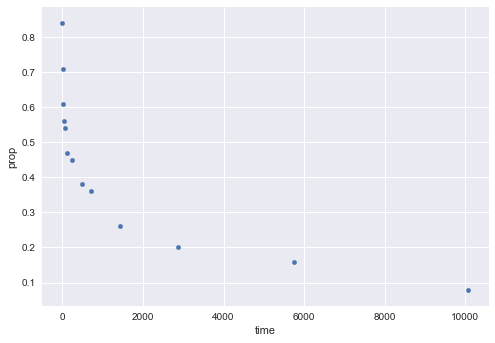

score: 0.57085844687


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta8/esim5.txt')
print((df.head()))

df.plot.scatter('time', 'prop')
plt.show()

from sklearn.linear_model import LinearRegression

x = df['time'].to_frame()
y = df['prop']

malli=LinearRegression()
malli.fit(x,y)
print('score:', malli.score(x,y))

Selvästikään riippuvuus ei ole lineaarista. Se voisi olla eksponetiaalista, josta saadaan lineaarinen riippuvuus logaritmisella muunnoksella.

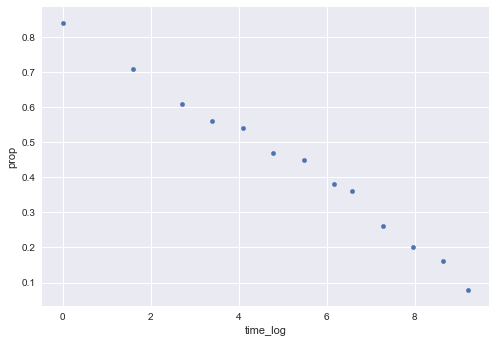

score: 0.989877643664


In [108]:
import numpy as np
df['time_log'] = np.log(df['time'])

df.plot.scatter('time_log', 'prop')
plt.show()

x = df['time_log'].to_frame()
y = df['prop']

malli=LinearRegression()
malli.fit(x,y)
print('score:', malli.score(x,y))



Usean selittävän muuttujan tapauksessa sopivien muunnosten päättely voi olla selvästi vaikeampaa. Jokaisen muuttujan osalta voidaan tehdä oma hajontakaavio, mutta tästä ei nähdä mahdollisia muuttujien yhteisvaikutuksia. 

scikit-learn-kirjaston `preprocessing.PolynomialFeatures`-luokka mahdollistaa eriasteisten polynomisovitusten tekemisen automaattisesti.

<a id="8a"></a>
### Muuttujien valinta

Jos datassa on paljon kenttiä, voi olla järkevää etsiä lineaariseen regressiomalliin selittäviksi muuttujiksi vain tärkeimmät. Karsintaa voi tehdä esim korrelaatiokertoimien avulla `df.corrwith(df['y'])`. Myös seabornin pairplot on käyttökelpoinen muuttujien valinnassa.

On myös huomioitava että välttämättä jonkun muuttujan heikko korrelaatio ei tarkoita etteikö sillä olisi vaikutusta: voi olla että jonkun muun muuttujan vaikutus on paljon suurempi mutta silti toisetkin muuttujat vaikuttavat. Esim sähköliittymä voi aina lisätä mökin hintaa 20000 e:lla mutta ei korreloi suoraan hintaan, joka riippuu voimakkaammin mökin koosta. Tällöin koko+sähkö -kombinaatio selittävät hinnan kuitenkin paremmin kuin pelkkä koko.


<a id="9a"></a>
### Muuttujien skaalaus
Useissa edistyksellisemmissä koneoppisen menetelmissä oletetaan selittävien muuttujien olevan suurin piirtein standardinormaalijakauman mukaisia. Jos jollain muuttujalla varianssi on eri kertaluokkaa muihin nähden, tämä muuttuja saattaa saada mallin muodostuksessa ylisuuren merkityksen.

Helpoiten skaalaus tehdään käyttäen `sklearn`-kirjaston `StandardScaler`-luokkaa.

In [39]:
from sklearn.preprocessing import StandardScaler

# ...

X = StandardScaler().fit_transform(X)
    
# ...

NameError: name 'X' is not defined


<a id="1b"></a>

## Logistinen regressio
Lineaarisessa regressiossa ennustetaan määrällisen muuttujan arvoa selittävien muuttujien avulla. Logistista regressiota käytetään jos ennustettavana on **kaksiarvoinen muuttuja**: ostaa tai ei osta, tulee maksuhäiriöitä tai ei tule, sairastuu tai ei sairastu. Selitettävä muuttuja koodataan yleensä arvoihin 1 ja 0.

Logistinen regressioanalyysi ei pyri ennustamaan määriä, vaan **todennäköisyyksiä**. Kyse on siis siitä, millä todennäköisyydellä tarkasteltavana oleva asia tapahtuu tai pätee. Tulokset kertovat, vaikuttavatko selittävät muuttujat tapahtuman todennäköisyyteen ja kuinka suuri vaikutus on.

### Esimerkki:
_Lomaosakkeita myyvä yritys tarjoaa edullisen viikonlopun kylpylässä lomaosakkeen esittelyyn osallistuville. Tarjous kannattaa kohdistaa henkilöille, joiden todennäköisyys lomaosakkeen ostoon on tavanomaista suurempi. Aiempien esittelyiden ja toteutuneiden kauppojen perusteella voidaan laatia malli, jolla lasketaan taustatietojen perusteella henkilön todennäköisyys lomaosakkeen ostoon._


Matemaattisesti logistista regressiomallia kuvaa funktio:  

![kaava1](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/kaava1.png)

joka antaa siis todennäköisyyden, että selittävien muuttujien arvoilla x<sub>1</sub>, x<sub>2</sub>,... saadaan selitettävälle muuttujalle arvo 1 (esim "ostaa")

Kaavassa on lineaarisesta regressiosta tuttu osa 
![kaava2](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/kaava2.png)
eli selittävistä muuttujista tehdään lineaarien malli. Tämän lineaarisen mallin antama arvo muutetaan **logistisella funktiolla** todennäköisyydeksi välille 0-1
![logistinen funktio](https://wikimedia.org/api/rest_v1/media/math/render/svg/b9db8cd0955e7898d6556581941581e3c7522f51)

Mallin sovitus siis hakee parametrit b<sub>0</sub>, b<sub>1</sub>, b<sub>2</sub>... siten, että syntynyt malli ennustaa selitettävän muuttujan arvoja parhaalla mahdollisella tavalla.

Mallin parametrit määritetään **maximum likelihood** eli suurimman uskottavuuden -menetelmällä, jonka perusidea on:
* Parametreille annetaan arvauksena alkuarvot.
* Lasketaan todennäköisyys sille, että havaittu data saataisiin näillä parametrien arvoilla.
* Korjataan parametreja siten että päästään parempaan tulokseen.
* Korjauksia tehdään, kunnes päästään parhaaseen mahdolliseen tulokseen. Paras mahdollinen tulos on se, johon liittyy suurin mahdollinen todennäköisyys sille, että havaittu data saataisiin valituilla parametrien arvoilla.

scikit-learn (sklearn) -kirjasto tekee toki tämän automaattisesti.

Malli antaa siis todennäköisyyden sille, että annetut alkuarvot antavat 1:n selitettävän muuttujan arvoksi. Toisaalta malli ennustaa ykköset niille lähtöarvoille, joille todennäköisyys on >0,5 ja nollat niille, joilla todennäköisyydeksi tulee alle 0,5.


Aloitetaan mallinnus lataamalla datasetti ja tutkimalla sitä. Tässä (kuvitteellisessa) aineistossa on henkilön vuositulot, ikä ja tieto siitä onko hän ostanut tuotteen vai ei (0/1).

In [70]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/esim1.txt')

print(df.sample(10))  # antaa 10 satunnaista riviä  

print('\n tsekataan ykkösten ja nollien määrä ostaa-sarakkeesta:\n')

print(df['ostaa'].value_counts())

    tulot  ikä  ostaa
51   6131   54      0
3   43571   50      0
14  68248   29      0
36  73449   28      0
39  37698   75      1
35  35570   47      0
54  65186   37      0
12  96601   36      0
49  22615   51      0
22  56516   27      0

 tsekataan ykkösten ja nollien määrä ostaa-sarakkeesta:

0    39
1    21
Name: ostaa, dtype: int64


Yritetään tulojen ja iän perusteella ennustaa ostamista. Aineisto on sen verran pieni, että ei jaeta sitä opetus- ja testidataan vaan sovitetaan mallia koko datalle. 
Mallin luonti ja sovitus menee samalla tavalla kuin lineaarisessa regressiossa.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


x = df[['tulot','ikä']]

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['ostaa']

malli = LogisticRegression()
malli.fit(x,y)
print(malli)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Pekka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Nähdään, että mallissa on paljon parametreja, niihin voi perehtyä scikit-learnin [speksissä](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Tässä voidaan mennä oletusasetuksilla.

Mitä malli sitten tekee? Siitä saa ulos kahdenlaisia ennusteita, voidaan ennustaa tuleeko tietyillä alkuarvoilla 0 vai 1. 

In [72]:
print(malli.predict(x)) # ennusteet kaikille riveille

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]


Jos halutaan ennuste yhdelle tulot + ikä -parille, pitää se skaalata aiemmin tallennettua StandardScaleria käyttäen.

In [83]:
print(malli.predict(scaler.transform([[45000,45]])))

[0]


`predict` antaa yksinkertaisesti ykkösen jos mallin antama todennäköisyys on yli 0,5, muuten nollan.  
`predict_proba` antaa tarkemmat todennäköisyydet, ensin nollan todennäköisyys, sitten ykkösen:

In [89]:
print(malli.predict_proba(scaler.transform([[45000,45]])))
print(malli.predict_proba(x)) # ennusteet kaikille riveille

[[0.8967149 0.1032851]]
[[0.99743731 0.00256269]
 [0.63637258 0.36362742]
 [0.94907247 0.05092753]
 [0.82342345 0.17657655]
 [0.86998135 0.13001865]
 [0.0568024  0.9431976 ]
 [0.99867092 0.00132908]
 [0.58212616 0.41787384]
 [0.98813415 0.01186585]
 [0.97565177 0.02434823]
 [0.90322531 0.09677469]
 [0.51435164 0.48564836]
 [0.46203572 0.53796428]
 [0.9941251  0.0058749 ]
 [0.94494652 0.05505348]
 [0.71820123 0.28179877]
 [0.0193708  0.9806292 ]
 [0.51213771 0.48786229]
 [0.48223083 0.51776917]
 [0.14420106 0.85579894]
 [0.96406962 0.03593038]
 [0.99344509 0.00655491]
 [0.98115938 0.01884062]
 [0.79384606 0.20615394]
 [0.12062465 0.87937535]
 [0.70943893 0.29056107]
 [0.97782625 0.02217375]
 [0.05243104 0.94756896]
 [0.0897024  0.9102976 ]
 [0.77134041 0.22865959]
 [0.95737631 0.04262369]
 [0.17986606 0.82013394]
 [0.98773643 0.01226357]
 [0.18319363 0.81680637]
 [0.96876835 0.03123165]
 [0.92640572 0.07359428]
 [0.93233051 0.06766949]
 [0.28051277 0.71948723]
 [0.19836095 0.80163905]
 

Mallin osumista voidaan testata `score`-metodilla, joka kertoo yksinkertaisesti kuinka iso osa ennusteista menee oikein:

In [74]:
print(malli.score(x, y))

0.9166666666666666


`confusion_matrix` kertoo väärin/oikein menneet tarkemmin:

In [75]:
from sklearn.metrics import confusion_matrix

y_pred = malli.predict(x) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(y, y_pred)) # verrataan totetutuneita arvoja ennusteisin

[[37  2]
 [ 3 18]]


Tässä 1. rivi kertoo mitä ennustettiin niille, joilla toteutuma oli nolla: 37 nollaa ja 2 ykköstä.  2. rivi kertoo miten kävi ykkösille: ennuste antoi 3 nollaa ja 18 ykköstä.

Siis oikein meni 37+18=55 ja väärin 2+3=5 ennustetta. Oikein menneet ovat "kofuusiomatriisin" päälävistäjällä

![oikeat](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/oikeat.png)


Mallin antamat lineaarisen osan kulmakertoimet b<sub>1</sub>, b<sub>2</sub> ja vakiotermi b<sub>0</sub> saadaan mallista ulos, mutta niiden tulkinta ei ole yhtä suoraviivaista kuin lineaarisessa regressiossa (etenkin kun selittävät muuttujat on skaalattu).

In [51]:
print(malli.coef_)
print(malli.intercept_)

[[1.96173099 1.99904391]]
[-1.10634419]


Nyt kun selittäviä muuttujia oli vain kaksi, voidaan jakaumaa havainnollistaa tasolla: piirretään eri värillä ykkösen antamat pisteet ja toisella nollan antamat pisteet:


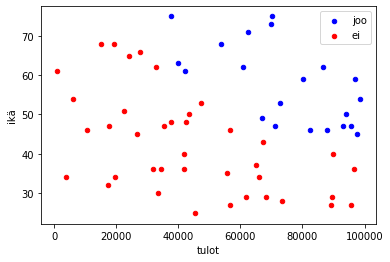

In [76]:
import matplotlib.pyplot as plt

tod_ostajat = df[df['ostaa']==1]  # jaetaan aineisto ostaneisiin ja ei-ostaneisiin
tod_muut = df[df['ostaa']==0]

ax1 = tod_ostajat.plot.scatter('tulot', 'ikä', color='b', label='joo')
tod_muut.plot.scatter('tulot', 'ikä', ax=ax1, color='r', label='ei')

plt.show()

Vastaava kaavio voidaan tehdä ennusteista, jotka oli aiemmin tallennettu y_pred-muuttujaan:

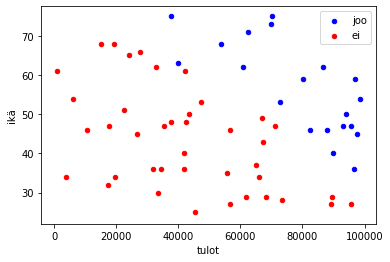

In [53]:

mall_ostajat = df[y_pred==1]  
mall_muut = df[y_pred==0]

ax1 = mall_ostajat.plot.scatter('tulot', 'ikä', color='b', label='joo')
mall_muut.plot.scatter('tulot', 'ikä', ax=ax1, color='r', label='ei')

plt.show()


Ennuste siis jakaa (kahden selittävän muuttuja tapauksessa) tason kahteen osaan sopivalla suoralla:

![ennuste](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/ennuste.png)

Väärin menneet voidaan poimia myös ainestosta:

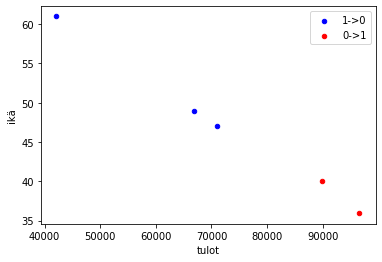

In [77]:
ykk_nollina = df[(y==1) & (y_pred==0)]
noll_ykk = df[(y==0) & (y_pred==1)]


ax1 = ykk_nollina.plot.scatter('tulot', 'ikä', color='b', label='1->0')
noll_ykk .plot.scatter('tulot', 'ikä', ax=ax1, color='r', label='0->1')

plt.show()


Scatter-kaavion voi tehdä myös niin, että pisteen koko kuvaa mallin antamaa ykkösen todennäköisyyttä:

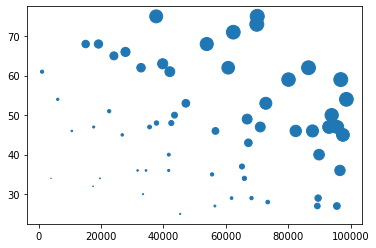

In [78]:
koot = pd.DataFrame(malli.predict_proba(x))


plt.scatter(df['tulot'], df['ikä'], s=koot[1]*200)
plt.show()

Yleensä selittäviä muuttujia on ennemmän kuin kaksi, jolloin vastaavia visualisointeja ei voi tehdä.

### Jako opetus- ja testidataan
Myös logistisessa regressiomallissa jaetaan isompi datasetti yleensä opetus- ja testidataan, ja testataan opetusdatalla sovitettua mallia testidataan (jota ei siis ole käytetty mallin kertoimien määrityksessä).

Jako tapahtuu helpoiten scikit-learnin `model_selection.train_test_split` -luokkalla.  Tässä esimerkissä aineisto on sen verran pieni että tulos (score) vaihtelee satunnaisesti kun arvotaan uusia "jakoja".

In [66]:
from sklearn.model_selection import train_test_split 

xTrain, xTest, yTrain, yTest = train_test_split(StandardScaler().fit_transform(x), y, test_size = 0.3)

print(xTrain.shape)
print(xTest.shape)

malli2 = LogisticRegression()

# tehdään malli opetusdatalla
malli2.fit(xTrain,yTrain)

# testataan testidatalla
print('\noikeiden osuus:',malli2.score(xTest,yTest)) 

y_pred = malli2.predict(xTest) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(yTest, y_pred)) # verrataan totetutuneita arvoja ennusteisin

(42, 2)
(18, 2)

oikeiden osuus: 0.8888888888888888
[[10  1]
 [ 1  6]]


C:\Users\Pekka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Kentät numeerisiksi
Myöskään logistista regressiomallia ei voi sovittaa tekstimuotoisiin kenttiin vaan ne on ensin muokattava numeerisiksi (kts kerta8).

Myöskään puuttuvia arvoja ei voi olla, usein ne korvataan kentän mediaanilla, keskiarvolla tai moodilla (jos kategorinen muuttuuja).

### Selittävien muuttujien valinta
Selittäviä muuttujia ei pidä ottaa logistiseen regressiomalliin enempää kuin on tarpeellista. Paras tilanne on, jos tiedän mukaan otettavat selittävät muuttujat aiempien aineistojen tai teorian kautta. Jos aiempaa tietoa tai teoriaa ei ole, niin voin käyttää apuna askeltavaa (Stepwise) menetelmää.

**Forward**-menetelmässä aloitetaan mallista, joka sisältää pelkästään vakiotermin. Malliin lisätään selittäviä muuttujia yksi kerrallaan. Lisättävä muuttuja on se, joka lisää eniten mallin selitysvoimaa. Uuden muuttujan lisäämisen jälkeen tarkistetaan, pitäisikö jokin malliin jo lisätyistä muuttujista poistaa.

**Backward**-menetelmässä otetaan ensimmäiseen malliin mukaan kaikki ehdokkaat. Tämän jälkeen selittäviä muuttujia poistetaan mallista yksi kerrallaan. Jos muuttujan poistaminen ei muuta merkitsevästi mallin selitysvoimaa, niin muuttuja poistetaan mallista. Muuttujien poistaminen lopetetaan, kun minkä tahansa muuttujan poistaminen heikentää merkittävästi mallin selitysvoimaa.

Näitä menetelmiä ei tutkita tällä kurssilla tarkemmin.


<a id="1c"></a>
## Päätöspuut (decision tree)
Päätöspuu on vuokaaviotyyppinen koneoppimismalli, jolla pyritään ennustamaan selitettävän muuttujan arvoa.

Valmis opetettu malli käytännössä jakaa dataa selittävien muuttujen arvojen perusteella seuraaviin solmuihin, jokainen solmu jakaa siihen tulevat rivit yhden muuttujan arvon mukaan. Valmiit päätöspuut voidaan visualisoida helposti:

![puu1](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/puu1.png)

Jokaisen solmun ylin rivi kertoo jakamisessa käytetyn kriteerin (tässä vain kaksi muuttujaan, ikä ja tulot), "lehtien" eli viimeisten laatikoiden viimeinen rivi ennustetun luokan (tässä 1/0 =  ostaa/ei osta).

Kriteerien valinnassa mallin sovitus käyttää jotain _Attribute selection measurea (ASM)_, joka hakee selittävistä muuttujuista sen, jonka avulla jaettaessa jäljellä oleva data jakautuu parhaiten selitettävän muuttujan osalta. 
Tämän jälkeen sama homma tehdään rekursiivisesti jokaisen solmun alla uudestaan, kunnes "jaettavaa ei enää ole".


Edelliessä visualisoinnissa olevat _gini_-lukemat kuvaavat valitun jakokriteerin "hyvyyttä": jos gini = 0, jäljelle jäävä joukko sisältää vain yhtä selitettävän muuttujan arvoa, ginin arvolla 0,5 jakauma on 50/50. Tässä siis jakokriteerien valintana on käytetty "gini-indeksiä", eli mikä jako tuottaa pienimmän keskimääräisen gini-indeksin (painotettuna jaon tuloksena syntyvien datasettien rivimäärillä).

Päätöspuuta voidaan sovittaa myös jatkuva-arvoisille selittettäville muuttujille (regressiopuu, regression tree), mutta tutkitaan tässä vain kaksiarvoista selitettävää muuttujaa (luokittelupuu, classification tree).

Ensimmäinen esimerkki saadaan kerta9:n datasta, jossa oli henkilön tulot, ikä ja tieto onko ostanut tuotteen vai ei (1/0). Ladataan data:

In [96]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta9/esim1.txt')

print(df.sample(10))  # antaa 10 satunnaista riviä  

print('\n tsekataan ykkösten ja nollien määrä ostaa-sarakkeesta:\n')

print(df['ostaa'].value_counts())

    tulot  ikä  ostaa
16  70089   75      1
54  65186   37      0
23  89598   29      0
56  19197   68      0
15  15094   68      0
53  34430   36      0
38  60778   62      1
39  37698   75      1
27  98667   54      1
57  89352   27      0

 tsekataan ykkösten ja nollien määrä ostaa-sarakkeesta:

0    39
1    21
Name: ostaa, dtype: int64


Nyt tuodaan `sklearn.tree`:sta `DecisionTreeClassifier`-luokka, ja luodaan siitä olio. Mallin sovitus menee vastaavalla tavalla kuin lineaarisessa/logistisessa regressiossa `fit`-metodilla.

Mallin antamat ennusteet saadaan `predict`-metodilla ja tarkkuus `score`lla, joka kertoo kuinka iso osa ennustetuista arvoista vastaa toteutunutta.

In [97]:
from sklearn.tree import DecisionTreeClassifier 

x = df[['tulot','ikä']]
y = df['ostaa']

# luodaan malli-olio
malli = DecisionTreeClassifier()

# sovitetetaan, eli generoidaan päätöspuu
malli.fit(x,y)

# ennustetaan tulokset
y_pred = malli.predict(x)

# katsotaan tarkkuus
print("Accuracy:",malli.score(x,y))


Accuracy: 1.0


Koska päätöspuu voi periaatteessa jakaa datan hyvinkin pieniin "lokeroihin", saadaan ennusteet 100%:ksi kun käytetään testidatana opetusdataa, ts. malli oppi jakamaan opetusdatan täydellisesti (näin ei toki tapahdu, jos datassa täsmälleen samoista lähtöarvoista tulee 2 eri lopputulosta). 

Niinpä päätöspuuta testatessa onkin tärkeää jakaa data opetus- ja testidataan, jotta voidaan testata mallia datalla, jota ei käytetä opetukseeen.

Tämän päätöspuun kriteerit on ylempänä olevassa vuokaaviossa, ja kun tässä selittäviä muuttujia on vain kaksi, voidaan ne visualisoida tasolle:

![jako1](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/jako1.png)

Tässä nähdään ero logistiseen regressioon, joka jakoi (2 muuttujan tapauksessa) tason kahteen osaan yhdellä parhaiten sopivalla suoralla:

![jako2](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/jako2.png)

Syntyneen päätöspuun vuokaavion saa aikaan `export_graphviz` -funktiolla, joka tekee _dot_-tiedoston: 

In [98]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree=malli, out_file="tree.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

![dot](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/dot.png)

Tämän _dot_-tiedoston voi muuttaa graafiseksi esitykseksi esim. https://dreampuf.github.io/GraphvizOnline/ -sivulla.

Mallin `feature_importances_`-kenttä kertoo kuinka paljon eri muuttujat vaikuttavat koneoppimismallin ennustuksiin: 

In [15]:
print(malli.feature_importances_)

[ 0.52545895  0.47454105]


Sama selkeämmin:

In [16]:
prossat = malli.feature_importances_
for i in range(len(prossat)):
    print(x.columns[i],': ',prossat[i]*100,'%')

tulot :  52.5458946512 %
ikä :  47.4541053488 %


Tehdään pitempi esimerkki Titanic-datalla. Ladataan data ja tutkitaan sarakkeita:

In [126]:
import pandas as pd

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

print(df.head()) 

print('\n--------------------\n')

print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

-

Yritetään ennustaa selvitytymistä muiden tietojen perusteella...

Poistetaan ensin datasta hyödyttömät muuttujat:

In [127]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

Tutkitaan, onko puuttuvia arvoja ja korvataan ne luokan mediaanilla ja moodilla:

In [128]:
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [129]:
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)
most_frequent_embarked = df["Embarked"].mode().loc[0]
df["Embarked"] = df["Embarked"].fillna(most_frequent_embarked)

0    S
dtype: object


Korvataan (enkoodataan) tekstimuuttujat numeroilla LabelEncoder() luokan avulla:

In [116]:
from sklearn.preprocessing import LabelEncoder

sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

# Millä numeroilla tekstit korvautuivat?  zip yhdistää listoja tms.
print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))

{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}


Luodaan uusia muuttujia, joiden avulla koneoppimismalli voi mahdollisesti oppia paremmin:

In [117]:
# Sibsp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard

df["FamilySize"] = df["SibSp"] + df["Parch"]  
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 0, "IsAlone"] = 0  

Valmistellaan data koneoppimismallin opetusta varten

In [118]:
# Irrotetaan ennustettava muuttuja datasta
y = df["Survived"]
x = df.drop("Survived", axis=1)
# Osa tulevista komennoista sisältää satunnaisuutta. Valitaan luku, jolla alustetaan
# satunnaislukugeneraattorit, jotta voimme saada myöhemmin samat tulokset, kun toistamme analyysin.
seed = 12345

# Jaetaan data opetus- ja testidataan.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)


Opetetaan koneoppimismalli ja testataan kuinka hyvin se toimii datalla, jota se ei ole nähnyt

In [119]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)

print("Test accuracy: %.2f" % model.score(x_test, y_test))


Test accuracy: 0.73


`confusion_matrix` kertoo tarkemmin oikein ja väärin menneiden osuudet 0/1 -arvoista.

In [121]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred)) # verrataan totetutuneita arvoja ennusteisin

[[78 27]
 [21 53]]


Eli ei-selviytyneistä 78 ennustetaan ei-selvityneeksi ja 27 selvityneeksi.
Vatsaavasti selviytyneistä 21 ei-selvityneeksi ja 53 selvityneeksi.

Tulostetaan lista muuttujista, jotka vaikuttavat eniten koneoppimismallin ennustuksiin

In [67]:
importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

feature:       Pclass - relative importance: 12.5 %
feature:          Sex - relative importance: 30.1 %
feature:          Age - relative importance: 25.6 %
feature:        SibSp - relative importance:  5.3 %
feature:        Parch - relative importance:  0.6 %
feature:         Fare - relative importance: 19.0 %
feature:     Embarked - relative importance:  1.3 %
feature:   FamilySize - relative importance:  4.1 %
feature:      IsAlone - relative importance:  1.4 %


Tehdään päästöspuusta dot-tiedosto

In [71]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree=model, out_file="tree_titanic.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

Nyt vuokaavuio on aika monimutkainen... jos katsotaan tarkemmin yhtä solmua:
![solmu1](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/solmu1.png)

FamilySize <= 3.5 kertoo seuraavan jaon kriteerin  
samples = 115 kertoo edellisestä jaosta tähän tulevat rivit (eli Pclass <= 2.5 , False)  
value = [63, 52] kertoo tähän tulevien rivien jakauman selitettävän muuttujan osalta, 63 nollaa, 52 ykköstä  
class = y[0] kertoo kumpia on enemmän  
gini = 0.495 on luku joka kertoo tähän tulevien rivin "heterogeenisyyden" (gini = 0 jos tulee vain 0 tai vain 1-rivejä).

vasen haara kuvaa True-, oikea haara False- rivejä jakokriteerin mukaan.

Mallia voi säätää antamalla sille parametreja, esim `max_depth` :llä voi rajoittaa puun syvyyttä.  Tässä tulos testidatalla paranee pienentämällä puun syvyyttä. Myös oletuksena olevan _gini_-jakokriteerien valintaperusteen sijaan voidaan laittaa "information gain"-tyyppinen menetelmä parametrilla `criterion=entropy`.

In [122]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Test accuracy: %.2f" % model2.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred2))

export_graphviz(decision_tree=model2, out_file="tree_titanic2.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

Test accuracy: 0.80
[[94 11]
 [24 50]]


### Ylisovittuminen

Monimutkaisilla (syvillä) päätöspuilla riskinä on ylisovittuminen, joka tarkoittaa että opetusdatasta löydetään pienimmätkin "lokerot", mutta malli ei sovellu hyvin enää testidataan.

[Elements of AI:](https://course.elementsofai.com/fi/)  
>Intuitiivisesti ajatellen ylisovittamisessa on kyse siitä, että yritetään olla ”liian fiksuja”. Kuvitellaan, että yritämme vaikkapa ennustaa suosikkiartistin uuden kappaleen menestystä ja päädymme sääntöön ”jos kappale kertoo rakkaudesta ja siinä on tarttuva kertosäe, se menee top 20 -listalle”. Kaksi kappaletta poikkeaa kuitenkin tästä, ja päätät lisätä tarkennuksen ”paitsi jos Ruotsi tai jooga on mainittu”, jotta saat myös nuo kaksi poikkeustapausta luokiteltua oikein. Kenties saat sääntösi sopimaan aiemmin kerättyyn opetusdataan täydellisesti, mutta se saattaakin itse asiassa heikentää tarkkuutta jatkossa kerättävällä testidatalla.

>Koneoppimisen menetelmät ovat erityisen alttiita ylisovittamiseen, koska ne voivat kokeilla valtavan määrän erilaisia sääntöjä, kunnes löytyy yksi, joka sopii opetusdataan täydellisesti. Erityisesti sellaiset menetelmät, joiden tuottamat mallit ovat kovin joustavia ja adaptoituvat lähes mihin tahansa datassa olevaan ilmiöön, voivat aiheuttaa helposti ylisovittamista, ellei opetusdatan määrä ole aivan valtava. 

### Useampiarvoinen selitettävä muuttuja

Päätöspuuta voi käyttää myös useampiarvoisen lopputuloksen ennustamiseen. Tällöin esim confusion_matrix antaa enemmän rivejä ja sarakkeita.

Klassinen esimerkki luokittelusta on kurjenmiekkojen (iris) luokittelu kolmeen lajiin (setosa, versicolor, virginica) terä- (petal) ja verholehtien (sepal) koon mukaan. Datasetti löytyy seabornin mallidataseteistä.

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
print(iris.sample(5))


#x-matriisi on iris-data ilman species-muuttujaa:
X = iris.drop('species', axis=1)

#y on species (laji). EI TARVITSE OLLA NUMEERINEN
y = iris['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=4)


from sklearn import tree

#Parametrilla max_depth määrätään päätöspuun maksimi syvyys.
malli = tree.DecisionTreeClassifier()
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_pred = malli.predict(X_train)
y_test_pred= malli.predict(X_test)



print('opetusdatalla: ',malli.score(X_train, y_train))
print('testidatalla: ', malli.score(X_test, y_test))



#Confusion-matriisi testidatalle:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))



     sepal_length  sepal_width  petal_length  petal_width     species
139           6.9          3.1           5.4          2.1   virginica
62            6.0          2.2           4.0          1.0  versicolor
38            4.4          3.0           1.3          0.2      setosa
120           6.9          3.2           5.7          2.3   virginica
5             5.4          3.9           1.7          0.4      setosa
opetusdatalla:  1.0
testidatalla:  0.9736842105263158
[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


In [100]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree=malli, out_file="iris.dot",
                feature_names=X.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True)

Pairplotista nähdään että lajien erottelu on aika helppoa:

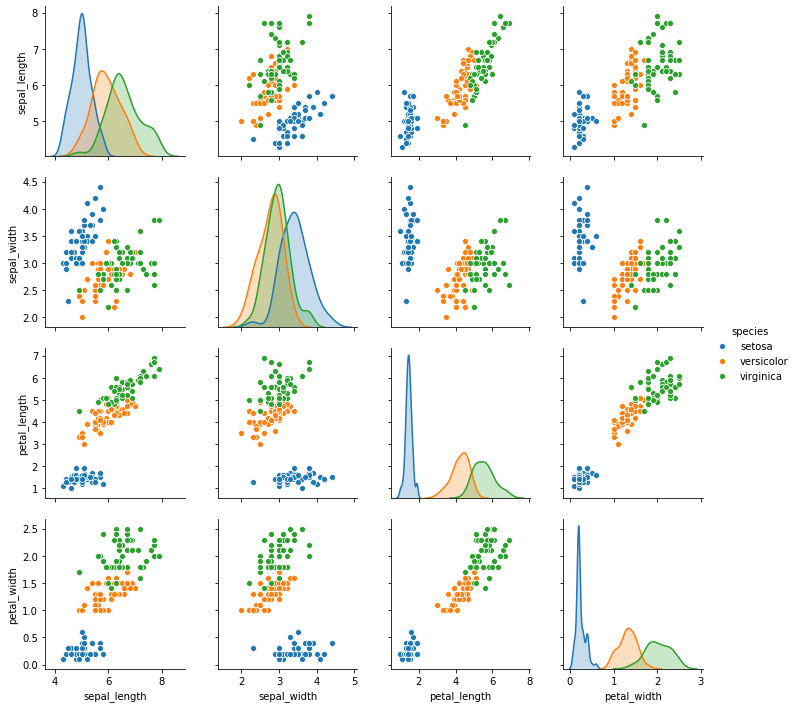

In [101]:
sns.pairplot(iris, hue='species')
plt.show()